In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.style as style
#style.use("fivethirtyeight")
pd.set_option("display.float_format", lambda x: "%.5f" % x)
pd.set_option("max_columns", None)

### App criteria
- Does not belong to saturated category
- decent ratings and installs

In [2]:
df = pd.read_csv("Google-Playstore.csv")

In [3]:
df.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2312944 entries, 0 to 2312943
Data columns (total 24 columns):
 #   Column             Dtype  
---  ------             -----  
 0   App Name           object 
 1   App Id             object 
 2   Category           object 
 3   Rating             float64
 4   Rating Count       float64
 5   Installs           object 
 6   Minimum Installs   float64
 7   Maximum Installs   int64  
 8   Free               bool   
 9   Price              float64
 10  Currency           object 
 11  Size               object 
 12  Minimum Android    object 
 13  Developer Id       object 
 14  Developer Website  object 
 15  Developer Email    object 
 16  Released           object 
 17  Last Updated       object 
 18  Content Rating     object 
 19  Privacy Policy     object 
 20  Ad Supported       bool   
 21  In App Purchases   bool   
 22  Editors Choice     bool   
 23  Scraped Time       object 
dtypes: bool(4), float64(4), int64(1), object(15)
memor

In [4]:
# Missing data sorted descending
(df.isnull().sum() / df.shape[0] * 100).sort_values(ascending=False)

Developer Website   32.89466
Privacy Policy      18.19988
Released             3.07197
Rating               0.98935
Rating Count         0.98935
Minimum Android      0.28232
Size                 0.00847
Currency             0.00584
Installs             0.00463
Minimum Installs     0.00463
Developer Id         0.00143
Developer Email      0.00134
App Name             0.00009
App Id               0.00000
Price                0.00000
Free                 0.00000
Maximum Installs     0.00000
Last Updated         0.00000
Content Rating       0.00000
Category             0.00000
Ad Supported         0.00000
In App Purchases     0.00000
Editors Choice       0.00000
Scraped Time         0.00000
dtype: float64

In [5]:
df.describe()

,Rating,Rating Count,Minimum Installs,Maximum Installs,Price
count,2290061.00000,2290061.00000,2312837.00000,2312944.00000,2312944.00000
mean,2.20315,2864.83888,183445.21396,320201.71314,0.10350
std,2.10622,212162.57104,15131439.05973,23554954.88655,2.63313
min,0.00000,0.00000,0.00000,0.00000,0.00000
25%,0.00000,0.00000,50.00000,84.00000,0.00000
50%,2.90000,6.00000,500.00000,695.00000,0.00000
75%,4.30000,42.00000,5000.00000,7354.00000,0.00000
max,5.00000,138557570.00000,10000000000.00000,12057627016.00000,400.00000


In [6]:
df

,App Name,App Id,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,Currency,Size,Minimum Android,Developer Id,Developer Website,Developer Email,Released,Last Updated,Content Rating,Privacy Policy,Ad Supported,In App Purchases,Editors Choice,Scraped Time
0,Gakondo,com.ishakwe.gakondo,Adventure,0.00000,0.00000,10+,10.00000,15,True,0.00000,USD,10M,7.1 and up,Jean Confident Irénée NIYIZIBYOSE,https://beniyizibyose.tk/#/,jean21101999@gmail.com,"Feb 26, 2020","Feb 26, 2020",Everyone,https://beniyizibyose.tk/projects/,False,False,False,2021-06-15 20:19:35
1,Ampere Battery Info,com.webserveis.batteryinfo,Tools,4.40000,64.00000,"5,000+",5000.00000,7662,True,0.00000,USD,2.9M,5.0 and up,Webserveis,https://webserveis.netlify.app/,webserveis@gmail.com,"May 21, 2020","May 06, 2021",Everyone,https://dev4phones.wordpress.com/licencia-de-uso/,True,False,False,2021-06-15 20:19:35
2,Vibook,com.doantiepvien.crm,Productivity,0.00000,0.00000,50+,50.00000,58,True,0.00000,USD,3.7M,4.0.3 and up,Cabin Crew,NaN,vnacrewit@gmail.com,"Aug 9, 2019","Aug 19, 2019",Everyone,https://www.vietnamairlines.com/vn/en/terms-an...,False,False,False,2021-06-15 20:19:35
3,Smart City Trichy Public Service Vehicles 17UC...,cst.stJoseph.ug17ucs548,Communication,5.00000,5.00000,10+,10.00000,19,True,0.00000,USD,1.8M,4.0.3 and up,Climate Smart Tech2,http://www.climatesmarttech.com/,climatesmarttech2@gmail.com,"Sep 10, 2018","Oct 13, 2018",Everyone,NaN,True,False,False,2021-06-15 20:19:35
4,GROW.me,com.horodyski.grower,Tools,0.00000,0.00000,100+,100.00000,478,True,0.00000,USD,6.2M,4.1 and up,Rafal Milek-Horodyski,http://www.horodyski.com.pl,rmilekhorodyski@gmail.com,"Feb 21, 2020","Nov 12, 2018",Everyone,http://www.horodyski.com.pl,False,False,False,2021-06-15 20:19:35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2312939,大俠客—熱血歸來,com.rxsj.ssjj,Role Playing,4.30000,16775.00000,"100,000+",100000.00000,337109,True,0.00000,USD,77M,4.1 and up,ALICE GAME,http://www.4399sy.com.hk/,ssjjcomhk@gmail.com,NaN,"Jun 01, 2021",Teen,http://a.4399sy.com.hk/user/aggreement,False,False,False,2021-06-16 12:59:18
2312940,ORU Online,com.threedream.oruonline,Education,0.00000,0.00000,100+,100.00000,430,True,0.00000,USD,44M,4.1 and up,"3Dream Studios, LLC",http://www.oru.edu/,3DreamDeveloper@gmail.com,"Jan 17, 2018","Feb 02, 2018",Everyone,http://www.oru.edu/about-oru/privacy-policy.php,False,False,False,2021-06-16 12:59:19
2312941,Data Structure,datastructure.appoworld.datastucture,Education,0.00000,0.00000,100+,100.00000,202,True,0.00000,USD,29M,5.0 and up,appoworld,NaN,appoworld.official@gmail.com,"Aug 19, 2018","Aug 19, 2018",Everyone,https://appoworld.000webhostapp.com/datastruct...,False,False,False,2021-06-16 12:59:19
2312942,Devi Suktam,ishan.devi.suktam,Music & Audio,3.50000,8.00000,"1,000+",1000.00000,2635,True,0.00000,USD,10M,5.0 and up,Bhakti,https://a70f78905.app-ads-txt.com,ruchisono@gmail.com,"Aug 1, 2016","May 05, 2021",Everyone,https://docs.google.com/document/d/1x-9reZuLRX...,True,False,False,2021-06-16 12:59:19


### Vague columns

In [7]:
df["Privacy Policy"].value_counts()

http://www.subsplash.com/legal/privacy                                            7481
https://unity3d.com/legal/privacy-policy                                          5312
http://www.trainerize.com/privacy.aspx                                            5181
http://www.chownow.com/privacy-policy                                             4783
https://classplusapp.com/privacy.html                                             4373
                                                                                  ... 
https://protsak2017.blogspot.com/2017/11/wallpaper-privacy-policy.html               1
http://aplus-development.com/policy/schoolapp/policy.php?app=4365&lg=en              1
https://www.rewindit.fm/privacy.html                                                 1
https://app.appmobilecity.com/application/privacypolicy/index/id/6008776bb8c57       1
https://biliyor-musun-sons.flycricket.io/privacy.html                                1
Name: Privacy Policy, Length: 977743, dtype

In [8]:
df["Minimum Android"].value_counts()

4.1 and up      604465
5.0 and up      396998
4.4 and up      390311
4.0.3 and up    180482
4.0 and up      153441
                 ...  
2.3 - 3.2            1
6.0 - 7.1.1          1
2.3 - 8.0            1
3.0 - 7.1.1          1
2.3.3 - 6.0          1
Name: Minimum Android, Length: 154, dtype: int64

In [9]:
df["Developer Id"].value_counts()

Subsplash Inc         5422
TRAINERIZE            5153
ChowNow               4865
OrderYOYO             2884
Phorest               2821
                      ... 
Jack Troshinsky          1
ITIPER                   1
East Point Systems       1
Yılmaz İsmail            1
Eventi                   1
Name: Developer Id, Length: 758371, dtype: int64

In [10]:
df["Editors Choice"].value_counts()

False    2312091
True         853
Name: Editors Choice, dtype: int64

In [11]:
df["Rating Count"].value_counts()

0.00000          1059762
5.00000            64288
6.00000            54325
7.00000            46838
8.00000            40585
                  ...   
9028.00000             1
27999.00000            1
1271735.00000          1
29786.00000            1
78351.00000            1
Name: Rating Count, Length: 38482, dtype: int64

In [12]:
df["Installs"].value_counts()

100+               443368
1,000+             398199
10+                300156
10,000+            256723
500+               189077
50+                170465
5,000+             143593
100,000+           110257
50,000+             75359
5+                  73772
1+                  65345
1,000,000+          33650
500,000+            27012
0+                  11566
5,000,000+           6595
10,000,000+          6192
50,000,000+           824
100,000,000+          549
500,000,000+           65
1,000,000,000+         55
5,000,000,000+         14
10,000,000,000+         1
Name: Installs, dtype: int64

In [13]:
df.sample(15, random_state= 40)

,App Name,App Id,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,Currency,Size,Minimum Android,Developer Id,Developer Website,Developer Email,Released,Last Updated,Content Rating,Privacy Policy,Ad Supported,In App Purchases,Editors Choice,Scraped Time
978208,Salario Mínimo MX,app.agsolutions.abraham.salariomnimomx,Finance,0.00000,0.00000,500+,500.00000,867,True,0.00000,USD,2.7M,4.1 and up,AG Solutions,NaN,agsolutions96@gmail.com,"Jan 19, 2019","Jan 26, 2019",Everyone,NaN,True,False,False,2021-06-16 11:58:01
788953,Dope - Attitude Wallpaper Hd - Motivational Qu...,com.vicky.wallpaperapp,Personalization,4.30000,75.00000,"10,000+",10000.00000,22253,True,0.00000,USD,11M,5.0 and up,Vicky Appss,NaN,hello@vickyapps.xyz,"Mar 24, 2020","Oct 21, 2020",Everyone,http://vickyapps.xyz/privacy-policy-wallpaper-...,True,False,False,2021-06-16 09:01:46
1503773,Music Player : No ads,com.dibandroid.softwareltdnfmusic,Music & Audio,3.40000,38.00000,"5,000+",5000.00000,5363,True,0.00000,USD,2.5M,5.0 and up,dib android software,NaN,dibsoftltd@gmail.com,"Feb 20, 2020","Feb 20, 2020",Teen,https://skydoctorbd.blogspot.com/p/music-playe...,False,False,False,2021-06-16 01:25:38
815844,Pung Kang Noodle House,com.chownow.pungkangnoodlehouse,Food & Drink,0.00000,0.00000,10+,10.00000,26,True,0.00000,USD,17M,5.0 and up,ChowNow,http://www.chownow.com,eng-android@chownow.com,"Jul 14, 2016","Feb 16, 2020",Everyone,http://www.chownow.com/privacy-policy,False,False,False,2021-06-16 09:26:50
210301,"Sorah ""REHMAN""",com.sialapps.sorah.rehman,Social,0.00000,0.00000,100+,100.00000,228,True,0.00000,USD,35M,2.0 and up,sialapps,NaN,sialapps12@gmail.com,"Jun 24, 2017","Jun 24, 2017",Teen,NaN,True,False,False,2021-06-15 23:53:11
228440,Fly and Spiders,info.fandroid.android,Arcade,4.70000,71.00000,"1,000+",1000.00000,2322,True,0.00000,USD,3.4M,2.3 and up,FandroidApps,http://www.fandroid.info,flygame@fandroid.info,"Dec 18, 2015","Jan 04, 2016",Everyone,NaN,True,False,False,2021-06-16 00:15:05
1035656,Asian Boulevard VIP,nl.loyaltygroup.asianboulevard,Food & Drink,0.00000,0.00000,500+,500.00000,724,True,0.00000,USD,18M,4.4 and up,Loyaltygroup BV,https://asianboulevard.nl/,info@asianboulevard.nl,"Nov 13, 2019","Feb 27, 2020",Mature 17+,https://www.loyaltygroup.nl/wp-content/privacy...,False,False,False,2021-06-16 12:52:59
582159,udn 售票網,com.udn.udntickets,Entertainment,1.80000,325.00000,"100,000+",100000.00000,127285,True,0.00000,USD,13M,4.4 and up,United Daily News Group,https://tickets.udnfunlife.com,cs.tickets@udnfunlife.com,"Nov 24, 2015","Oct 16, 2019",Everyone,http://www.udngroup.com/information/privacy,False,False,False,2021-06-16 05:49:09
1970053,ماجد المهندس - محلا اللقى (بدون الإنترنت) 2020,com.eltudo.maji,Music & Audio,0.00000,0.00000,100+,100.00000,277,True,0.00000,USD,21M,4.0.3 and up,tudo,NaN,eltudo2016@gmail.com,"Feb 17, 2020","Feb 17, 2020",Everyone,NaN,True,False,False,2021-06-16 07:59:57
729396,Jazz Radio Free,com.jazzradiogratis.jaazmusicradio,Music & Audio,4.40000,17.00000,"1,000+",1000.00000,1443,True,0.00000,USD,9.8M,4.2 and up,Apps Radio - Full Musica Online,NaN,elcreativotuamor@gmail.com,"Oct 15, 2020","Oct 16, 2020",Teen,https://appsradiofullmusica.blogspot.com/2020/...,True,False,False,2021-06-16 08:05:46


Non-English language apps, need to remove

In [14]:
df.head()

,App Name,App Id,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,Currency,Size,Minimum Android,Developer Id,Developer Website,Developer Email,Released,Last Updated,Content Rating,Privacy Policy,Ad Supported,In App Purchases,Editors Choice,Scraped Time
0,Gakondo,com.ishakwe.gakondo,Adventure,0.00000,0.00000,10+,10.00000,15,True,0.00000,USD,10M,7.1 and up,Jean Confident Irénée NIYIZIBYOSE,https://beniyizibyose.tk/#/,jean21101999@gmail.com,"Feb 26, 2020","Feb 26, 2020",Everyone,https://beniyizibyose.tk/projects/,False,False,False,2021-06-15 20:19:35
1,Ampere Battery Info,com.webserveis.batteryinfo,Tools,4.40000,64.00000,"5,000+",5000.00000,7662,True,0.00000,USD,2.9M,5.0 and up,Webserveis,https://webserveis.netlify.app/,webserveis@gmail.com,"May 21, 2020","May 06, 2021",Everyone,https://dev4phones.wordpress.com/licencia-de-uso/,True,False,False,2021-06-15 20:19:35
2,Vibook,com.doantiepvien.crm,Productivity,0.00000,0.00000,50+,50.00000,58,True,0.00000,USD,3.7M,4.0.3 and up,Cabin Crew,NaN,vnacrewit@gmail.com,"Aug 9, 2019","Aug 19, 2019",Everyone,https://www.vietnamairlines.com/vn/en/terms-an...,False,False,False,2021-06-15 20:19:35
3,Smart City Trichy Public Service Vehicles 17UC...,cst.stJoseph.ug17ucs548,Communication,5.00000,5.00000,10+,10.00000,19,True,0.00000,USD,1.8M,4.0.3 and up,Climate Smart Tech2,http://www.climatesmarttech.com/,climatesmarttech2@gmail.com,"Sep 10, 2018","Oct 13, 2018",Everyone,NaN,True,False,False,2021-06-15 20:19:35
4,GROW.me,com.horodyski.grower,Tools,0.00000,0.00000,100+,100.00000,478,True,0.00000,USD,6.2M,4.1 and up,Rafal Milek-Horodyski,http://www.horodyski.com.pl,rmilekhorodyski@gmail.com,"Feb 21, 2020","Nov 12, 2018",Everyone,http://www.horodyski.com.pl,False,False,False,2021-06-15 20:19:35


In [15]:
df["Currency"].value_counts(dropna = False)

USD    2311548
XXX       1236
NaN        135
EUR          6
INR          5
GBP          3
CAD          2
VND          1
BRL          1
KRW          1
TRY          1
RUB          1
SGD          1
AUD          1
PKR          1
ZAR          1
Name: Currency, dtype: int64

In [16]:
columns_dropped =   [
                        "App Id",
                        "Developer Website",
                        "Developer Email",
                        "Privacy Policy",
                        "Scraped Time"
                    ]

df = df.drop(columns=columns_dropped)

In [17]:
df["App Name"] = df["App Name"].astype("string")

In [18]:
df["App Name"].dtype

string[python]

In [19]:
df = df.dropna()

In [20]:
# Missing data sorted descending
(df.isnull().sum() / df.shape[0] * 100).sort_values(ascending=False)

App Name           0.00000
Size               0.00000
In App Purchases   0.00000
Ad Supported       0.00000
Content Rating     0.00000
Last Updated       0.00000
Released           0.00000
Developer Id       0.00000
Minimum Android    0.00000
Currency           0.00000
Category           0.00000
Price              0.00000
Free               0.00000
Maximum Installs   0.00000
Minimum Installs   0.00000
Installs           0.00000
Rating Count       0.00000
Rating             0.00000
Editors Choice     0.00000
dtype: float64

In [21]:
# Non-English language apps (sample)
df[~df["App Name"].map(lambda x: x.isascii())].sample(30)

,App Name,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,Currency,Size,Minimum Android,Developer Id,Released,Last Updated,Content Rating,Ad Supported,In App Purchases,Editors Choice
2213895,R+실과로봇 (ROBOTIS),Education,0.00000,0.00000,"1,000+",1000.00000,1910,True,0.00000,USD,17M,2.3.3 and up,ROBOTIS,"Mar 22, 2019","Nov 29, 2019",Everyone,False,False,False
7155,가천대 학식 (기숙사 포함),Lifestyle,0.00000,0.00000,"1,000+",1000.00000,1483,True,0.00000,USD,2.0M,4.1 and up,JungApp,"Mar 16, 2016","Aug 30, 2019",Everyone,False,False,False
292338,أغنية شيرين لأحمد زكي الجديدة | رمضان 2018 (نغ...,Music & Audio,4.00000,7.00000,"1,000+",1000.00000,1543,True,0.00000,USD,5.6M,4.0.3 and up,MiXxAt App,"Jun 6, 2018","Jun 06, 2018",Everyone,True,False,False
2179978,🥇 Old Time Radio USA Indianapolis Indiana US,Music & Audio,0.00000,0.00000,10+,10.00000,22,True,0.00000,USD,4.9M,4.1 and up,CyJ Studio,"Nov 8, 2019","Feb 26, 2020",Teen,True,False,False
716927,عبارات حب مجنونة,Photography,4.20000,36.00000,"10,000+",10000.00000,27775,True,0.00000,USD,6.9M,4.2 and up,Emadcyber,"Jul 20, 2018","Jul 20, 2018",Teen,True,False,False
2236284,Dream Pop Radio Pro 🎧,Music & Audio,0.00000,0.00000,100+,100.00000,240,True,0.00000,USD,5.3M,2.3.3 and up,FZILIEZAR,"Sep 25, 2016","Sep 25, 2016",Teen,True,False,False
310537,escape room：to the moon,Puzzle,3.90000,411.00000,"10,000+",10000.00000,16585,True,0.00000,USD,60M,4.0 and up,Flag Entertainment,"Aug 24, 2018","Nov 01, 2019",Teen,True,False,False
151745,Rádio Česká republika - Živě !,Music & Audio,0.00000,0.00000,10+,10.00000,49,True,0.00000,USD,5.6M,4.1 and up,Harmony Apps,"Apr 15, 2020","Apr 15, 2020",Teen,True,False,False
76460,أسرار زيادة حليب الأم المرضع,Books & Reference,4.20000,6.00000,"1,000+",1000.00000,4534,True,0.00000,USD,2.8M,4.1 and up,FouApps,"Nov 7, 2020","Jun 08, 2021",Everyone,False,False,False
2027571,Efésios Bíblicos,Books & Reference,0.00000,0.00000,100+,100.00000,119,True,0.00000,USD,18M,4.4 and up,MBEN Entertainment,"Mar 3, 2020","Apr 01, 2020",Everyone,True,False,False


In [22]:
# Filter out non-english language apps
df = df[df["App Name"].map(lambda x: x.isascii())]

In [23]:
# Change developer id data type to "string"
df["Developer Id"] = df["Developer Id"].astype("string")

In [24]:
# Non-english language developers
df[~df["Developer Id"].map(lambda x: x.isascii())].sample(30)

,App Name,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,Currency,Size,Minimum Android,Developer Id,Released,Last Updated,Content Rating,Ad Supported,In App Purchases,Editors Choice
480958,apoTAN+,Finance,1.50000,833.00000,"50,000+",50000.00000,75963,True,0.00000,USD,20M,4.1 and up,Deutsche Apotheker- und Ärztebank,"May 25, 2020","Aug 12, 2020",Everyone,False,False,False
2119364,Hello World,Communication,0.00000,0.00000,1+,1.00000,2,True,0.00000,USD,6.3M,2.1 and up,Jérôme Deì'ns,"Mar 13, 2020","Mar 13, 2020",Everyone,False,False,False
1385328,Fibretech Air Springs,Business,0.00000,0.00000,10+,10.00000,24,True,0.00000,USD,48M,5.0 and up,Vector Otomotiv Tic. A.Ş.,"Oct 12, 2017","Nov 10, 2019",Everyone,False,False,False
2117771,Chatter,Business,0.00000,0.00000,5+,5.00000,8,True,0.00000,USD,18M,5.0 and up,Sezin Tıp MR ve Tomografi Görüntüleme LTD.ŞTİ,"May 3, 2020","May 09, 2020",Everyone,False,False,False
1677179,Pizza e Vino,Food & Drink,5.00000,8.00000,100+,100.00000,142,True,0.00000,USD,18M,3.1 and up,Consumer Soluções em Tecnologia Ltda,"Jan 15, 2021","Jan 15, 2021",Mature 17+,False,False,False
968253,SDMLS RealTOURS,House & Home,0.00000,0.00000,100+,100.00000,273,True,0.00000,USD,67M,5.0 and up,Greater San Diego Association of REALTORS®,"Mar 31, 2020","Jul 14, 2020",Everyone,False,False,False
2301413,Frases romanticas para mi amor,Entertainment,0.00000,0.00000,10+,10.00000,32,True,0.00000,USD,5.8M,4.1 and up,Vinicio Muñoz,"May 14, 2019","May 15, 2019",Teen,True,False,False
1800773,Selvatica Photo,Travel & Local,4.40000,8.00000,500+,500.00000,965,True,0.00000,USD,12M,6.0 and up,Utopía Software SA de CV,"Aug 20, 2019","Aug 20, 2019",Everyone,False,False,False
820146,Sagah - Anatomia Humana,Education,0.00000,0.00000,"1,000+",1000.00000,1928,True,0.00000,USD,24M,4.0 and up,SAGAH Educação,"Feb 4, 2019","Feb 04, 2019",Everyone,False,False,False
1462381,Por la corona (de la Vendimia),Action,4.70000,52.00000,100+,100.00000,418,True,0.00000,USD,36M,4.0 and up,Hugo Gómez,"Mar 1, 2016","Mar 03, 2016",Everyone 10+,False,False,False


In [25]:
# Filter out non-english speaking developers
df = df[df["Developer Id"].map(lambda x: x.isascii())]

In [26]:
df.sample(30)

,App Name,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,Currency,Size,Minimum Android,Developer Id,Released,Last Updated,Content Rating,Ad Supported,In App Purchases,Editors Choice
606181,We Play Pro,Entertainment,4.90000,19.00000,500+,500.00000,542,True,0.00000,USD,10M,4.1 and up,ArBeyondCreatives,"Dec 4, 2016","Jan 22, 2017",Everyone,False,False,False
438341,Official Peshawar Zalmi PSL Live Cricket Strea...,Sports,4.10000,44232.00000,"5,000,000+",5000000.00000,9558860,True,0.00000,USD,18M,4.4 and up,"Rockville Technologies, Pvt. Ltd.","Mar 13, 2016","Mar 09, 2020",Everyone,True,False,False
1781153,Radio Stations - Listen to Taiwanese music,Music & Audio,0.00000,0.00000,50+,50.00000,71,True,0.00000,USD,2.8M,4.0.3 and up,BegoodSoft,"Jun 17, 2019","Oct 07, 2019",Everyone,True,False,False
921128,MyTV-Alb,Video Players & Editors,4.10000,71.00000,"10,000+",10000.00000,16882,True,0.00000,USD,6.7M,4.1 and up,MyTV-Alb,"Mar 8, 2017","Mar 20, 2017",Everyone,False,False,False
136235,HD LG Wallpaper,Personalization,4.40000,2010.00000,"100,000+",100000.00000,204966,True,0.00000,USD,21M,4.1 and up,RumaTech Inc.,"Mar 16, 2017","May 23, 2020",Everyone,True,False,False
1364026,Peter's Discount Liquors,Shopping,0.00000,0.00000,10+,10.00000,26,True,0.00000,USD,24M,5.1 and up,City Hive Inc,"Aug 12, 2020","Mar 02, 2021",Mature 17+,False,False,False
460480,Tortugas,Food & Drink,0.00000,0.00000,100+,100.00000,140,True,0.00000,USD,15M,4.1 and up,"Live Tour Network, Inc","Nov 30, 2016","Mar 16, 2021",Mature 17+,True,False,False
1332075,Big Slots:Casino Slot Machines,Casino,4.60000,561.00000,"10,000+",10000.00000,35725,True,0.00000,USD,37M,3.2 and up,Big Casino Team,"Apr 21, 2015","Nov 03, 2016",Teen,True,True,False
347614,PokerAtlas Mobile,Entertainment,3.60000,77.00000,"10,000+",10000.00000,30119,True,0.00000,USD,15M,5.0 and up,Overlay Gaming Corp,"Oct 30, 2019","Jun 03, 2021",Teen,True,False,False
1318567,PS Jewellers,Finance,0.00000,0.00000,10+,10.00000,44,True,0.00000,USD,"1,014k",5.1 and up,Mayank Khurmai,"Nov 12, 2020","Dec 12, 2020",Everyone,False,False,False


In [27]:
df[df.duplicated()]

,App Name,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,Currency,Size,Minimum Android,Developer Id,Released,Last Updated,Content Rating,Ad Supported,In App Purchases,Editors Choice
1680429,Lou Streetfood,Food & Drink,0.00000,0.00000,1+,1.00000,1,True,0.00000,USD,1.9M,4.2 and up,Sitedish,"Mar 30, 2021","Mar 30, 2021",Everyone,False,False,False
1951985,Baltimore Traveler Map All Amenity & ATM Finder,Maps & Navigation,0.00000,0.00000,1+,1.00000,2,True,0.00000,USD,3.4M,4.1 and up,Worldwide Radio Stations,"Mar 1, 2020","Mar 02, 2020",Everyone 10+,True,False,False


In [28]:
df = df.drop_duplicates()

In [29]:
df["Rating Count"].describe()

count     1887692.00000
mean         2884.94044
std        206550.84391
min             0.00000
25%             0.00000
50%             5.00000
75%            39.00000
max     138557570.00000
Name: Rating Count, dtype: float64

In [30]:
#df[["Released","Last Updated"]] = df[["Released","Last Updated"]].apply(pd.to_datetime)
 

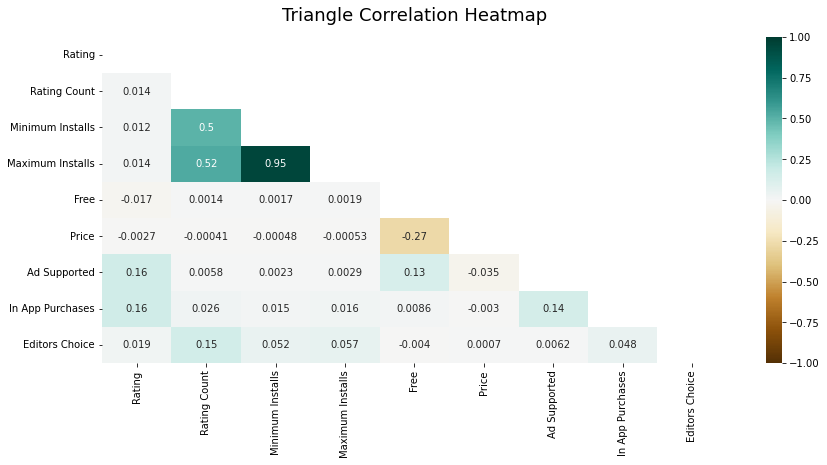

In [31]:
plt.figure(figsize=(14, 6))
mask = np.triu(np.ones_like(df.corr(), dtype=bool))
heatmap = sns.heatmap(df.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16);

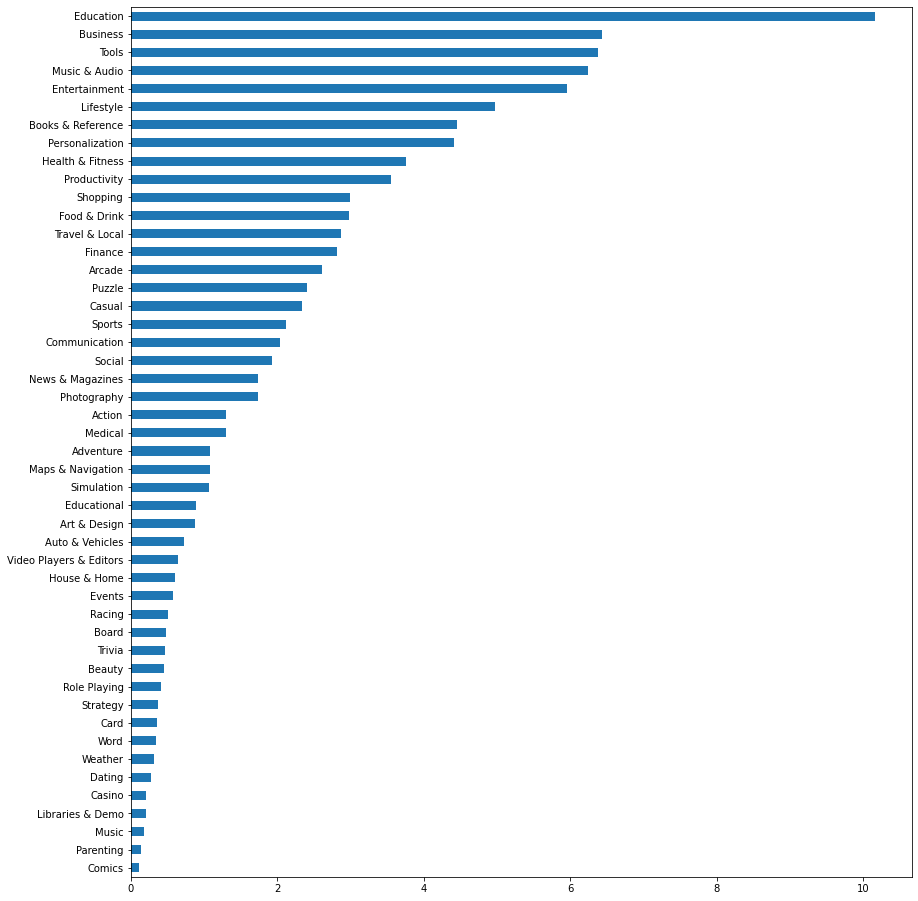

In [32]:

(df["Category"].value_counts(normalize = True) * 100).plot.barh(figsize = (14,16))
plt.gca().invert_yaxis()

In [33]:
# Missing data sorted descending
(df.isnull().sum() / df.shape[0] * 100).sort_values(ascending=False)

App Name           0.00000
Size               0.00000
In App Purchases   0.00000
Ad Supported       0.00000
Content Rating     0.00000
Last Updated       0.00000
Released           0.00000
Developer Id       0.00000
Minimum Android    0.00000
Currency           0.00000
Category           0.00000
Price              0.00000
Free               0.00000
Maximum Installs   0.00000
Minimum Installs   0.00000
Installs           0.00000
Rating Count       0.00000
Rating             0.00000
Editors Choice     0.00000
dtype: float64

<AxesSubplot:xlabel='Rating'>

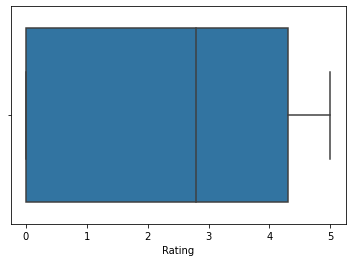

In [34]:
sns.boxplot(x = df["Rating"])

In [35]:
df["Rating"].describe()

count   1887692.00000
mean          2.16160
std           2.10578
min           0.00000
25%           0.00000
50%           2.80000
75%           4.30000
max           5.00000
Name: Rating, dtype: float64

In [36]:
df["Rating Count"].describe()

count     1887692.00000
mean         2884.94044
std        206550.84391
min             0.00000
25%             0.00000
50%             5.00000
75%            39.00000
max     138557570.00000
Name: Rating Count, dtype: float64

(array([9.95486e+05, 1.50000e+01, 7.00000e+00, 0.00000e+00, 1.00000e+00,
        0.00000e+00, 1.00000e+00, 0.00000e+00, 2.00000e+00, 1.00000e+00]),
 array([5.00000000e+00, 1.38557615e+07, 2.77115180e+07, 4.15672745e+07,
        5.54230310e+07, 6.92787875e+07, 8.31345440e+07, 9.69903005e+07,
        1.10846057e+08, 1.24701814e+08, 1.38557570e+08]),
 <BarContainer object of 10 artists>)

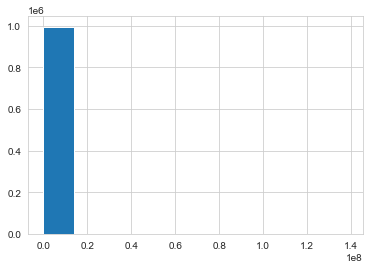

In [50]:
plt.hist(df["Rating Count"])

<AxesSubplot:xlabel='Rating Count'>

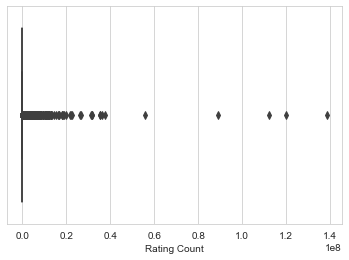

In [51]:
sns.boxplot(x = df["Rating Count"])

In [53]:
# App categories with 0 reviews, counted
df[df["Rating Count"] == 0]["Category"].value_counts().sort_values(ascending = False)

Series([], Name: Category, dtype: int64)

In [40]:
df["Maximum Installs"].describe()

count       1887692.00000
mean         335409.41797
std        23708436.53174
min               0.00000
25%              77.00000
50%             621.00000
75%            6614.00000
max     12057627016.00000
Name: Maximum Installs, dtype: float64

In [41]:
# Applications with more than zero installs and reviews
df = df[(df["Maximum Installs"] > 0) & (df["Rating Count"] > 0)]

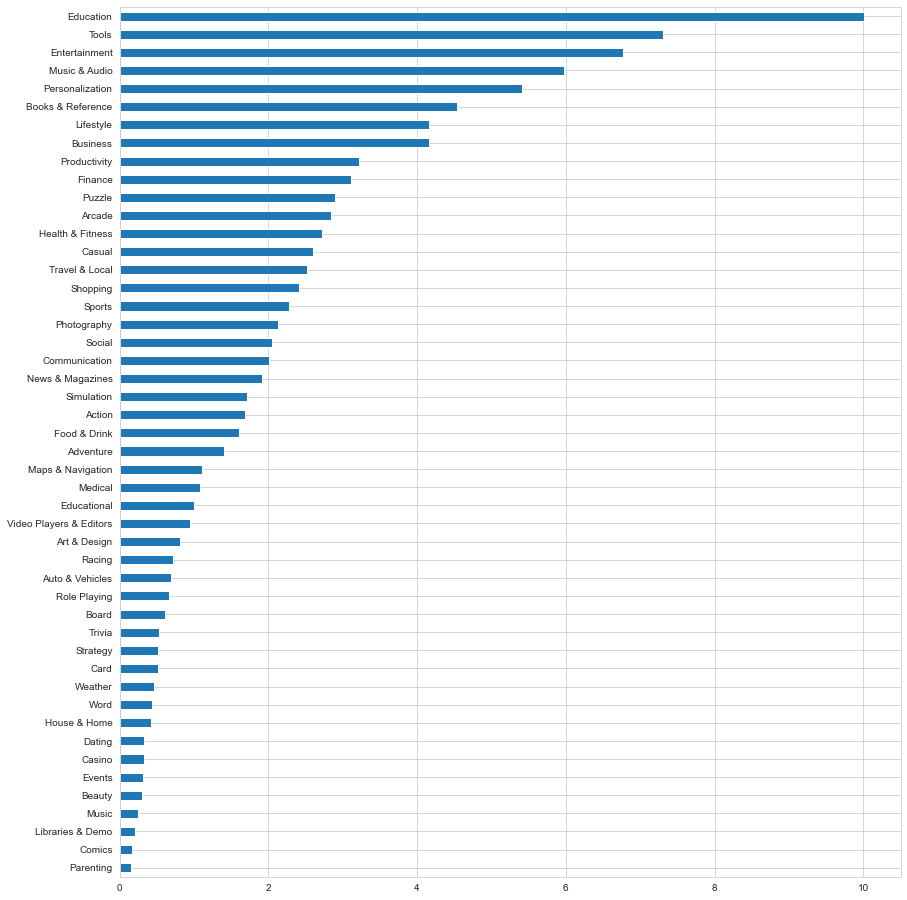

In [42]:
sns.set_style("whitegrid")
(df["Category"].value_counts(normalize = True) * 100).plot.barh(figsize = (14,16))
plt.gca().invert_yaxis()

<AxesSubplot:ylabel='Category'>

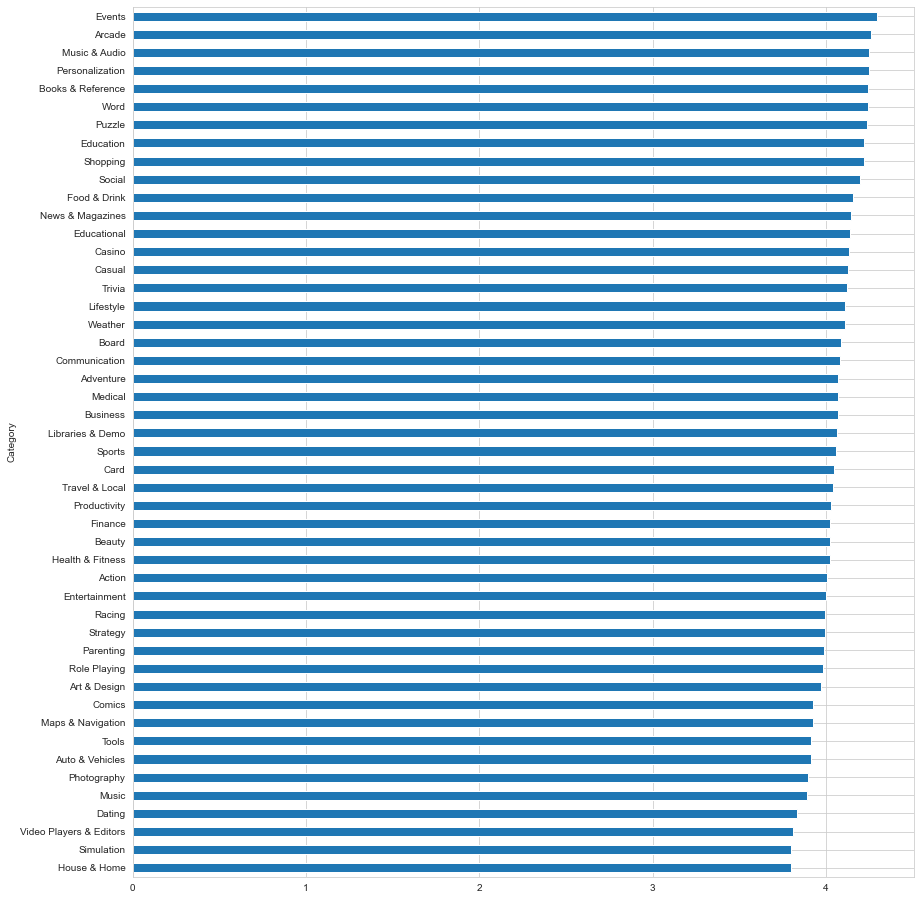

In [43]:
categories_grouped = df.groupby("Category")
categories_grouped["Rating"].mean().sort_values(ascending = True).plot.barh(figsize = (14,16))

In [44]:
df.columns

Index(['App Name', 'Category', 'Rating', 'Rating Count', 'Installs',
       'Minimum Installs', 'Maximum Installs', 'Free', 'Price', 'Currency',
       'Size', 'Minimum Android', 'Developer Id', 'Released', 'Last Updated',
       'Content Rating', 'Ad Supported', 'In App Purchases', 'Editors Choice'],
      dtype='object')

Text(0.5, 1.0, 'Max installs')

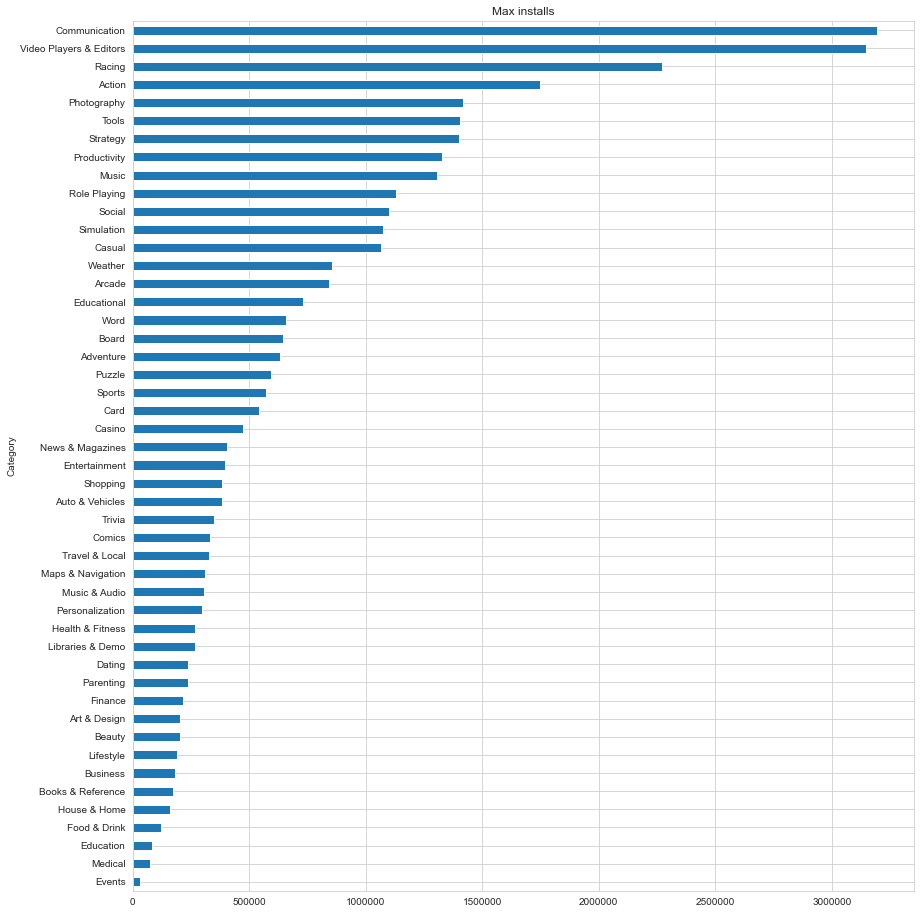

In [45]:
categories_grouped["Maximum Installs"].mean().sort_values(ascending = True).plot.barh(figsize = (14,16))
plt.ticklabel_format(style='plain', axis = "x")
plt.title("Max installs")

Text(0.5, 1.0, 'Min installs')

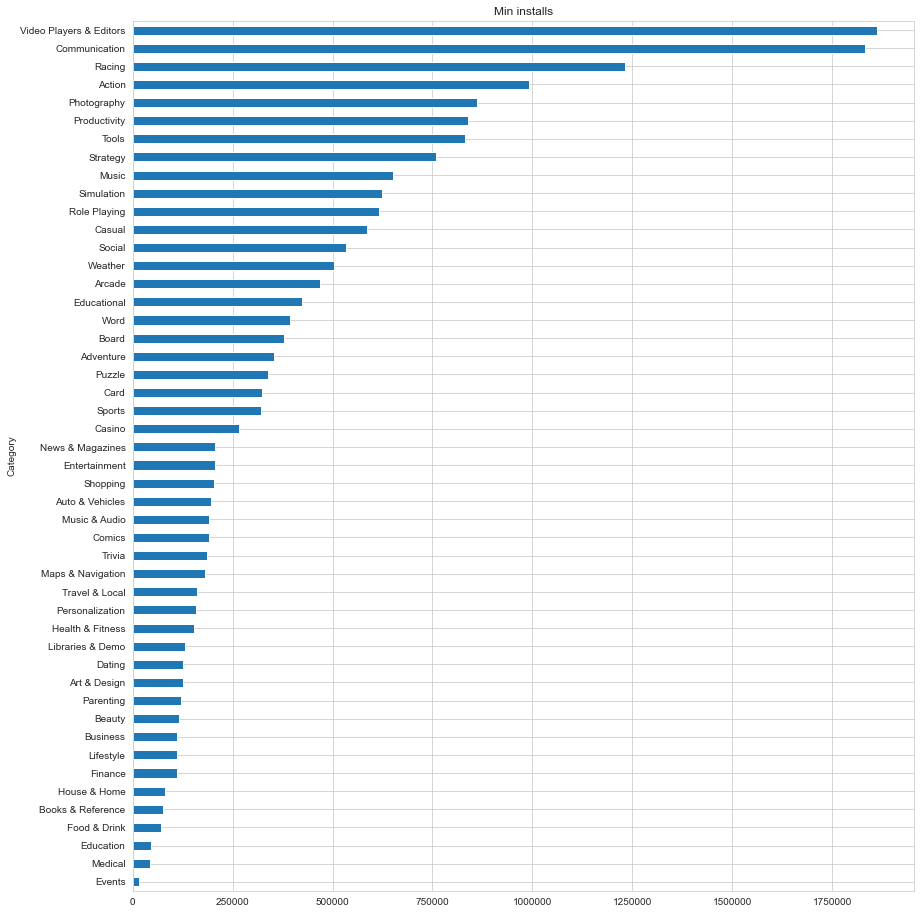

In [46]:
categories_grouped["Minimum Installs"].mean().sort_values(ascending = True).plot.barh(figsize = (14,16))
plt.ticklabel_format(style='plain', axis = "x")
plt.title("Min installs")

<AxesSubplot:>

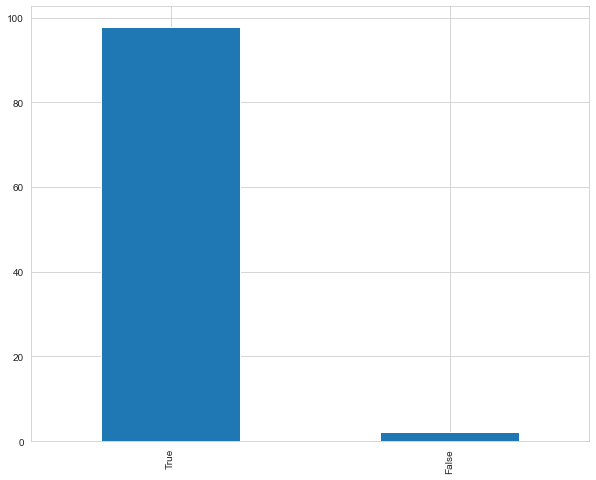

In [47]:
(df["Free"].value_counts(normalize = True) * 100).plot.bar(figsize = (10,8))

In [48]:
"""irrelevant_cat = ['Puzzle', 
                  'Arcade', 
                  'Simulation', 
                  'Action', 
                  'Adventure', 
                  'Racing', 
                  'Role Playing', 
                  'Board', 
                  'Strategy', 
                  'Casino', 
                  'Card', 
                  'Word', 
                  'Sports', 
                  'Trivia',
                  'Casual',
                  'Music',
                  'Educational']

for cat in irrelevant_cat:
    df = df.drop(df.index[df['Category'] == cat])"""

"irrelevant_cat = ['Puzzle', \n                  'Arcade', \n                  'Simulation', \n                  'Action', \n                  'Adventure', \n                  'Racing', \n                  'Role Playing', \n                  'Board', \n                  'Strategy', \n                  'Casino', \n                  'Card', \n                  'Word', \n                  'Sports', \n                  'Trivia',\n                  'Casual',\n                  'Music',\n                  'Educational']\n\nfor cat in irrelevant_cat:\n    df = df.drop(df.index[df['Category'] == cat])"

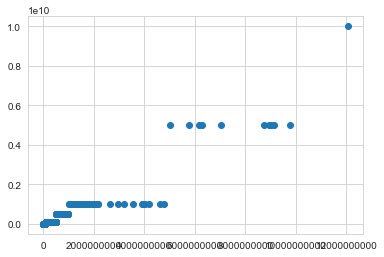

In [49]:
plt.scatter(df["Maximum Installs"], df["Minimum Installs"])
plt.ticklabel_format(style='plain', axis = "x")